# US Company Bankruptcy Prediction Dataset
### Accounting Data of NYSE and NASDAQ Companies (1999-2018)

A novel dataset for bankruptcy prediction related to American public companies listed on the New York Stock Exchange and NASDAQ is provided. The dataset comprises accounting data from 8,262 distinct companies recorded during the period spanning from 1999 to 2018.

According to the Security Exchange Commission (SEC), a company in the American market is deemed bankrupt under two circumstances. Firstly, if the firm's management files for Chapter 11 of the Bankruptcy Code, indicating an intention to "reorganize" its business. In this case, the company's management continues to oversee day-to-day operations, but significant business decisions necessitate approval from a bankruptcy court. Secondly, if the firm's management files for Chapter 7 of the Bankruptcy Code, indicating a complete cessation of operations and the company going out of business entirely.

In this dataset, the fiscal year prior to the filing of bankruptcy under either Chapter 11 or Chapter 7 is labeled as "Bankruptcy" (1) for the subsequent year. Conversely, if the company does not experience these bankruptcy events, it is considered to be operating normally (0). The dataset is complete, without any missing values, synthetic entries, or imputed added values.

The resulting dataset comprises a total of 78,682 observations of firm-year combinations. To facilitate model training and evaluation, the dataset is divided into three subsets based on time periods. The training set consists of data from 1999 to 2011, the validation set comprises data from 2012 to 2014, and the test set encompasses the years 2015 to 2018. The test set serves as a means to assess the predictive capability of models in real-world scenarios involving unseen cases.



| Variable Name           | Description                                                                                           |
|-------------------------|-------------------------------------------------------------------------------------------------------|
| X1                      | Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year |
| X2                      | Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products |
| X3                      | Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time. |
| X4                      | EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income. |
| X5                      | Inventory - The accounting of items and raw materials that a company either uses in production or sells. |
| X6                      | Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue. |
| X7                      | Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers. |
| X8                      | Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9                      | Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts. |
| X10                     | Total assets - All the assets, or items of value, a business owns. |
| X11                     | Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date. |
| X12                     | EBIT - Earnings before interest and taxes. |
| X13                     | Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services. |
| X14                     | Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining. |
| X15                     | Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders. |
| X16                     | Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments. |
| X17                     | Total Liabilities - The combined debts and obligations that the company owes to outside parties. |
| X18                     | Total Operating Expenses - The expenses a business incurs through its normal business operations. |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\prashant\Downloads\archive\american_bankruptcy.csv')

In [4]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [43]:
df.tail()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713
78681,C_8971,alive,2018,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,...,160.513,1625.370,632.122,2.061,91.696,79.365,84.995,160.513,712.687,93.251


In [5]:
df1=df.copy()
df1.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [6]:
df1.columns

Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [8]:
column_mapping = {
    'company_name': 'Company Name',
    'status_label': 'Status',
    'year': 'Year',
    'X1': 'Current Assets',
    'X2': 'Cost of Goods Sold',
    'X3': 'Depreciation and Amortization',
    'X4': 'EBITDA',
    'X5': 'Inventory',
    'X6': 'Net Income',
    'X7': 'Total Receivables',
    'X8': 'Market Value',
    'X9': 'Net Sales',
    'X10': 'Total Assets',
    'X11': 'Total Long-term Debt',
    'X12': 'EBIT',
    'X13': 'Gross Profit',
    'X14': 'Total Current Liabilities',
    'X15': 'Retained Earnings',
    'X16': 'Total Revenue',
    'X17': 'Total Liabilities',
    'X18': 'Total Operating Expenses'
}

# Rename the columns using the mapping dictionary
df1 = df1.rename(columns=column_mapping)

In [9]:
df1.head()

,Company Name,Status,Year,Current Assets,Cost of Goods Sold,Depreciation and Amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Net Sales,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company Name                   78682 non-null  object 
 1   Status                         78682 non-null  object 
 2   Year                           78682 non-null  int64  
 3   Current Assets                 78682 non-null  float64
 4   Cost of Goods Sold             78682 non-null  float64
 5   Depreciation and Amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market Value                   78682 non-null  float64
 11  Net Sales                      78682 non-null  float64
 12  Total Assets                   78682 non-null 

In [11]:
df1.columns

Index(['Company Name', 'Status', 'Year', 'Current Assets',
       'Cost of Goods Sold', 'Depreciation and Amortization', 'EBITDA',
       'Inventory', 'Net Income', 'Total Receivables', 'Market Value',
       'Net Sales', 'Total Assets', 'Total Long-term Debt', 'EBIT',
       'Gross Profit', 'Total Current Liabilities', 'Retained Earnings',
       'Total Revenue', 'Total Liabilities', 'Total Operating Expenses'],
      dtype='object')

In [12]:
df1['Status'].value_counts()

Status
alive     73462
failed     5220
Name: count, dtype: int64

In [13]:
df1['Status'] = df1['Status'].replace({'alive': 1, 'failed': 0})
df1['Status']=df1['Status'].astype('float')

In [14]:
df1['Status'].dtype

dtype('float64')

In [15]:
status_col = df1.pop('Status')

# Insert the 'Status' column at the last position
df1.insert(len(df1.columns), 'Status', status_col)

# Display the updated DataFrame
df1.head()

,Company Name,Year,Current Assets,Cost of Goods Sold,Depreciation and Amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,...,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses,Status
0,C_1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,...,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1.0
1,C_1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,...,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,1.0
2,C_1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,...,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,1.0
3,C_1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,...,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,1.0
4,C_1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,...,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,1.0



1. Cost of Goods Sold (COGS): **COGS = Opening Inventory + Purchases - Closing Inventory**

2. EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization): **EBITDA = Operating Revenue - Operating Expenses**

3. Net Income: **Net Income = Total Revenue - Total Expenses**

4. Net Sales: **Net Sales = Gross Sales - Sales Returns and Allowances - Sales Discounts**

5. EBIT (Earnings Before Interest and Taxes): **EBIT = Revenue - Expenses (excluding interest and taxes)**

6. Gross Profit: Gross Profit = **Net Sales - Cost of Goods Sold**



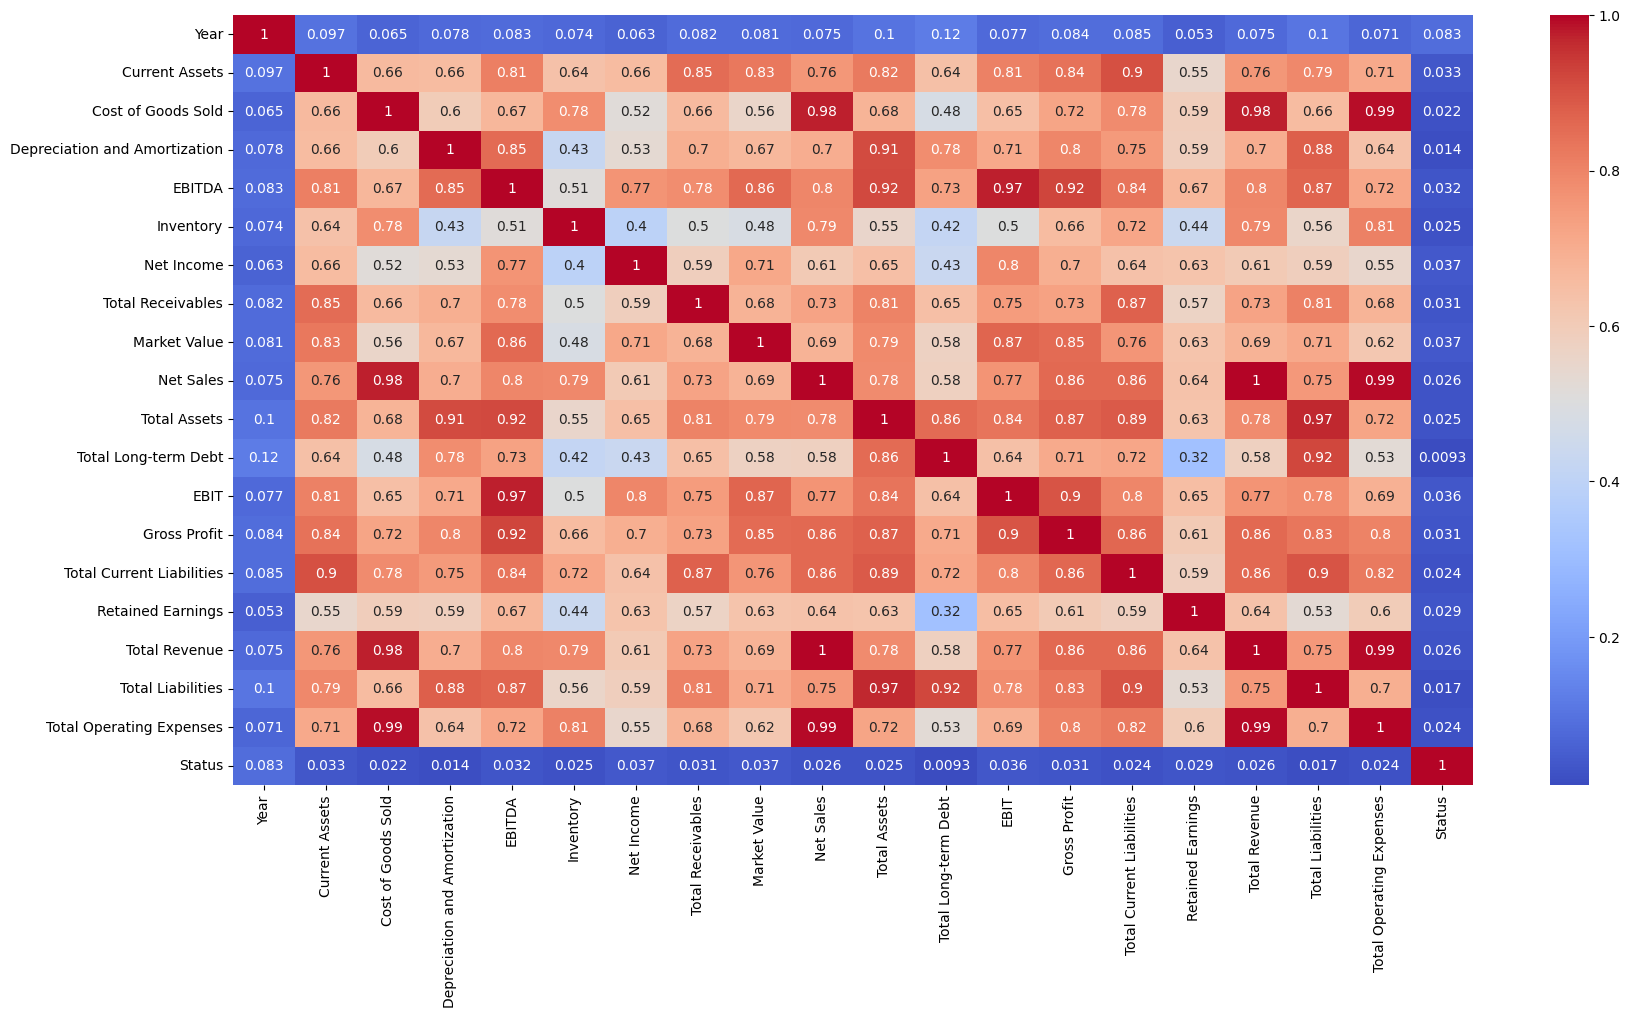

In [16]:

numerical_columns = df1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(20,10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

**Current Assets and Total Current Liabilities: The level of current assets should ideally be higher than total current liabilities. A higher ratio indicates a company's ability to cover its short-term obligations using its readily available assets.**

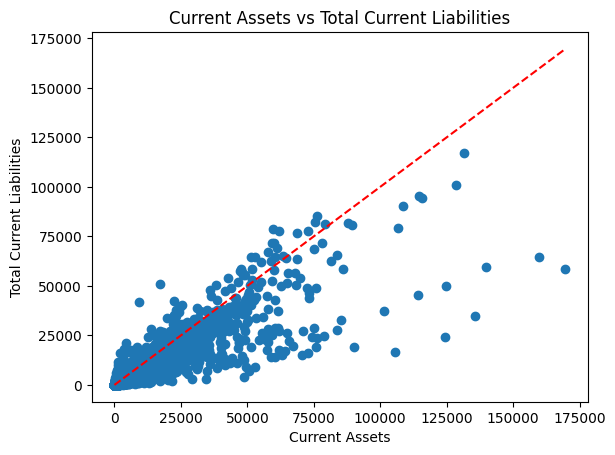

In [17]:
# Plotting the scatter plot
plt.scatter(data=df1,x='Current Assets', y='Total Current Liabilities', alpha=1)
plt.xlabel("Current Assets")
plt.ylabel("Total Current Liabilities")
plt.title("Current Assets vs Total Current Liabilities")

# Adding a line at the ideal ratio of 1:1
plt.plot([df1['Current Assets'].min(), df1['Current Assets'].max()], [df1['Current Assets'].min(), df1['Current Assets'].max()], color='red', linestyle='--')

plt.show()

**Cost of Goods Sold (COGS) and Gross Profit: Gross profit is derived by subtracting COGS from net sales. Analyzing the trend and magnitude of the gross profit margin can provide insights into the company's ability to generate profits from its core operations.**

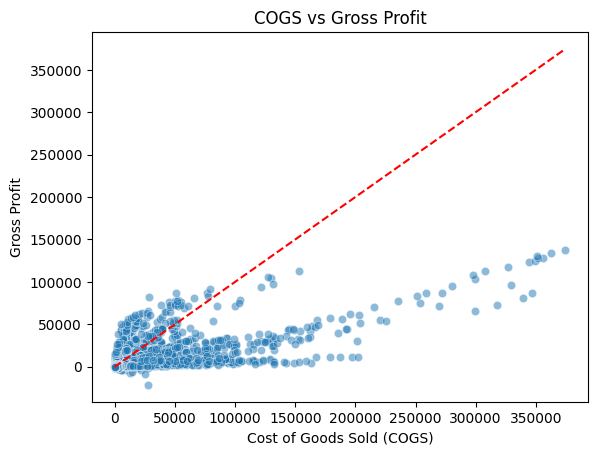

In [18]:
sns.scatterplot(data=df1,x='Cost of Goods Sold', y='Gross Profit', alpha=0.5)
plt.xlabel("Cost of Goods Sold (COGS)")
plt.ylabel("Gross Profit")
plt.title("COGS vs Gross Profit")
plt.plot([df1['Cost of Goods Sold'].min(), df1['Cost of Goods Sold'].max()], [df1['Cost of Goods Sold'].min(), df1['Cost of Goods Sold'].max()], color='red', linestyle='--')
plt.show()

**EBITDA and Total Long-term Debt: Assessing the ratio of EBITDA to total long-term debt can indicate the company's ability to generate sufficient operating income to cover its long-term debt obligations.**

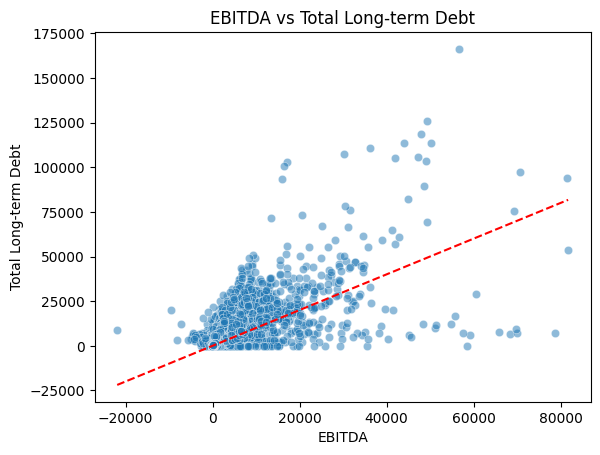

In [19]:
sns.scatterplot(data=df1,x='EBITDA', y='Total Long-term Debt', alpha=0.5)
plt.xlabel("EBITDA")
plt.ylabel("Total Long-term Debt")
plt.title("EBITDA vs Total Long-term Debt")
plt.plot([df1['EBITDA'].min(), df1['EBITDA'].max()], [df1['EBITDA'].min(), df1['EBITDA'].max()], color='red', linestyle='--')
plt.show()

**Net Income and Total Revenue: Analyzing the net income margin (net income divided by total revenue) can provide insights into the company's profitability and its ability to convert revenue into profits.**

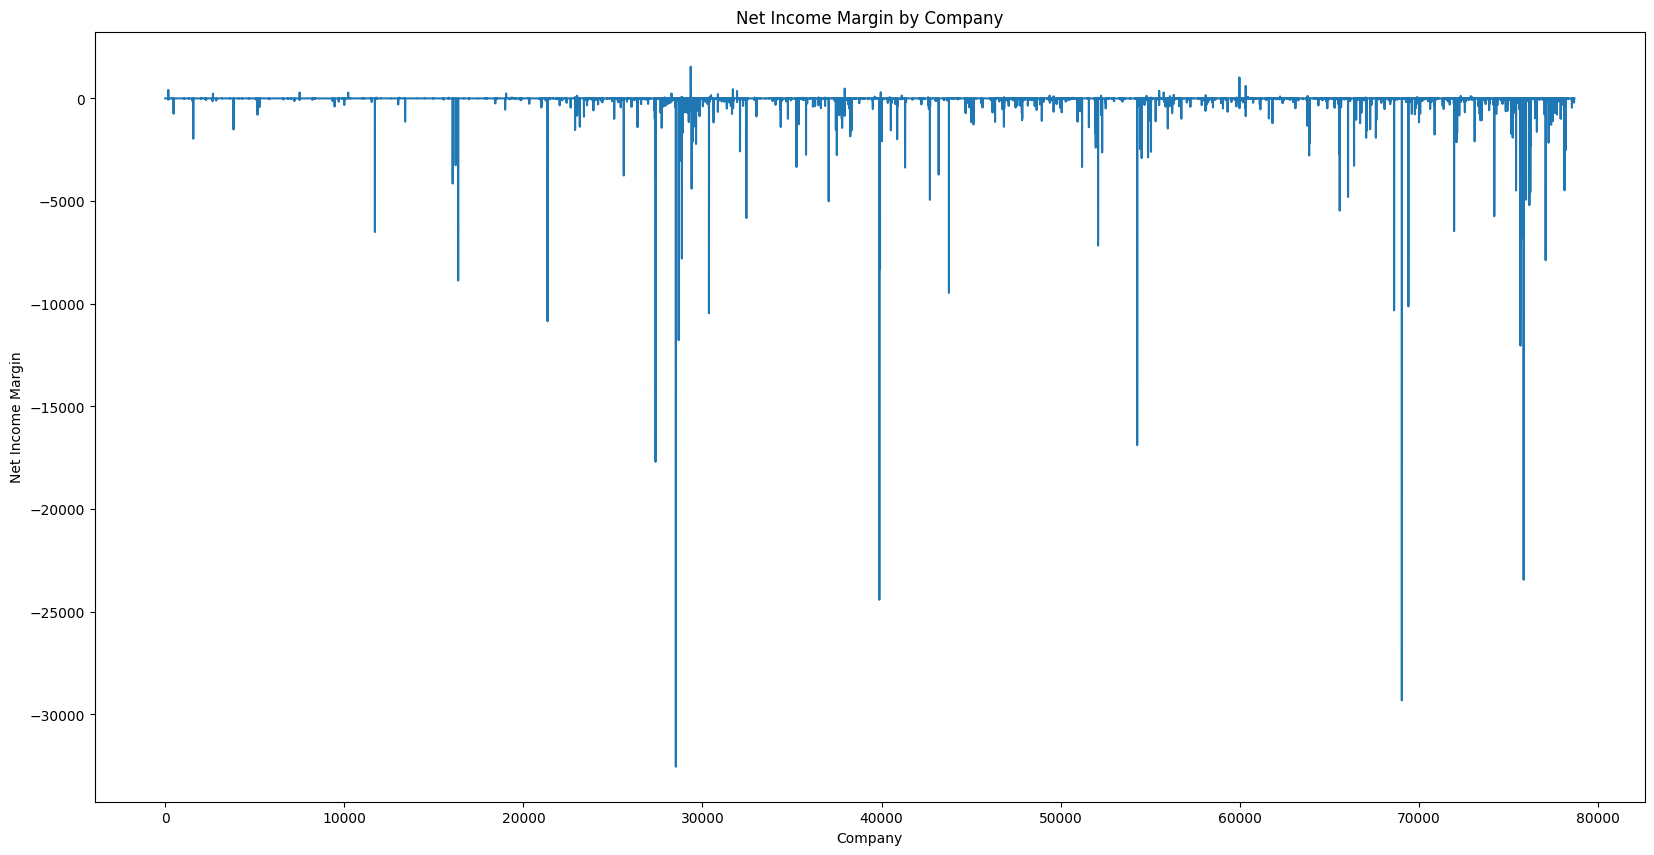

In [28]:
net_income_margin = [ni / tr for ni, tr in zip(df1['Net Income'],df1['Total Revenue'])]
plt.figure(figsize=(20,10))
# Creating a line plot or bar plot using matplotlib.pyplot
plt.plot(net_income_margin)
# or
# plt.bar(range(len(net_income_margin)), net_income_margin)

plt.xlabel("Company")
plt.ylabel("Net Income Margin")
plt.title("Net Income Margin by Company")

plt.show()

**Total Liabilities and Total Assets: The ratio of total liabilities to total assets can indicate the company's overall debt burden and its financial leverage. Higher levels of liabilities relative to assets may indicate higher financial risk.**

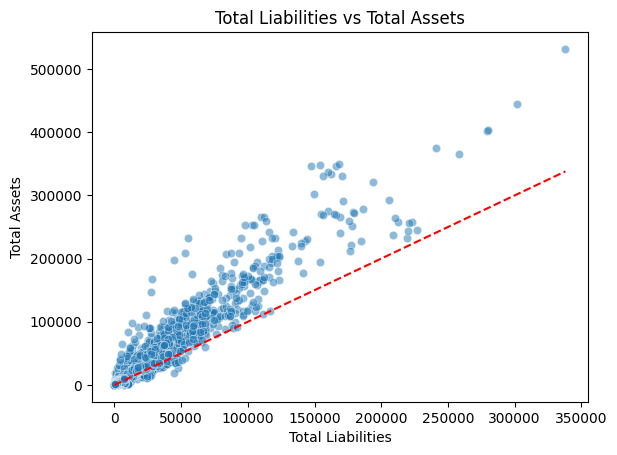

In [30]:
sns.scatterplot(data=df1,x='Total Liabilities', y='Total Assets', alpha=0.5)
plt.xlabel("Total Liabilities")
plt.ylabel("Total Assets")
plt.title("Total Liabilities vs Total Assets")
plt.plot([df1['Total Liabilities'].min(), df1['Total Liabilities'].max()], [df1['Total Liabilities'].min(), df1['Total Liabilities'].max()], color='red', linestyle='--')
plt.show()

### Filtering the companies that are performing poor

In [34]:
def filter_data(dataset):
    filtered_data = dataset[
        (dataset['Total Liabilities'] > dataset['Total Assets']) &
        (dataset['Net Income'] < dataset['Total Revenue']) &
        (dataset['EBITDA'] < dataset['Total Long-term Debt']) &
        (dataset['Cost of Goods Sold'] > dataset['Gross Profit']) &
        (dataset['Current Assets'] < dataset['Total Current Liabilities'])
    ]
    return filtered_data

In [35]:
filtered_data = filter_data(df1)

In [40]:
filtered_data

,Company Name,Year,Current Assets,Cost of Goods Sold,Depreciation and Amortization,EBITDA,Inventory,Net Income,Total Receivables,Market Value,...,Total Assets,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses,Status
55,C_6,2004,4971.000,15120.000,1292.000,1159.000,488.000,-761.000,836.000,1764.6582,...,28773.000,13524.000,-133.000,3525.000,7018.000,-1976.000,18645.000,29354.000,17486.000,0.0
56,C_6,2005,6164.000,16832.000,1164.000,1266.000,515.000,-861.000,991.000,4062.1324,...,29495.000,13456.000,102.000,3880.000,8320.000,-3152.000,20712.000,30973.000,19446.000,0.0
57,C_6,2006,6902.000,17659.000,1157.000,2217.000,506.000,231.000,988.000,6717.8315,...,29145.000,12041.000,1060.000,4904.000,8505.000,-3185.000,22563.000,29751.000,20346.000,0.0
59,C_6,2008,5935.000,20232.000,1083.000,510.000,525.000,-2071.000,811.000,2976.3858,...,25175.000,9001.000,-573.000,3534.000,9374.000,-6638.000,23766.000,28110.000,23256.000,0.0
60,C_6,2009,6642.000,16935.000,1007.000,262.000,557.000,-1468.000,768.000,2571.1835,...,25438.000,10583.000,-745.000,2982.000,7728.000,-7860.000,19917.000,28927.000,19655.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78526,C_8948,2010,1.255,0.549,0.114,-6.866,0.084,-17.900,0.437,21.7393,...,2.228,0.000,-6.980,0.423,6.637,-39.349,0.972,6.637,7.838,1.0
78531,C_8948,2015,0.028,2.420,0.267,-2.229,0.000,-2.996,0.028,2.6481,...,0.717,0.000,-2.496,-2.229,8.921,-66.950,0.191,8.921,2.420,1.0
78602,C_8958,2012,2.710,1.941,0.466,-5.558,2.203,-8.235,0.208,0.7123,...,3.055,1.262,-6.024,-0.838,3.109,-159.347,1.103,5.689,6.661,1.0
78603,C_8958,2013,0.470,1.948,0.130,-2.603,0.427,-2.904,0.000,0.3606,...,0.550,1.238,-2.733,-1.522,3.433,-161.723,0.426,6.072,3.029,1.0


In [41]:
filtered_data['Company Name'].value_counts()

Company Name
C_2751    18
C_5109    15
C_4094    14
C_5756    13
C_4233    12
          ..
C_6190     1
C_6193     1
C_3481     1
C_6202     1
C_8968     1
Name: count, Length: 1542, dtype: int64

**Out of 8971 companies there are 1542 companies are performing poorly**